# **Final Project 2 - Classification**

Nama        : Afwa Afini <br>
KMI Batch   : 5 <br>

## 1. Introduction
----

#### 1.1. Background

Rain is an important element in the hydrological cycle which plays a vital role in maintaining ecosystem balance and providing a source of water for life. In an effort to understand rain patterns and behavior, analysis of rain datasets in an area is an important need.

The rain dataset used in this analysis is rain data in Australia which includes parameters such as location, rainfall, air temperature, relative humidity, air pressure, wind direction and so on over a certain time period. By combining this data we can identify correlations between variables, understand the factors that influence rainfall patterns and develop accurate predictive models for disaster risk mitigation and natural resource management.

In the process of analyzing this rain dataset and to handle the classification problem, namely predicting whether tomorrow will 'rain' or 'not rain', several algorithm models will be used:
- Logistic Regression
- SVM
- Naive Bayes
- Decision Trees

#### 1.2 Dataset
The dataset was obtained from Kaggle with the name __[Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)__. This dataset has 23 attributes with a total of 145,460 records. The attribute that is the target variable is the 'RainTomorrow' column. If the target variable produces 'Yes', then the next day it will rain 1mm or more.

#### 1.3 Objectives

The objectives to be achieved from the analysis of this dataset are:
- Retrieve some insights from the unprocessed rain dataset.
- Build machine learning models and select the best one for the final analysis of rain data by reviewing f1-score results.
- Produce a prediction that an area in Australia will experience rain/no rain tomorrow

## 2. Import Libraries
----

In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, classification_report
from scipy.stats import uniform

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# To hide the warning
import warnings
warnings.filterwarnings("ignore")

## 3. Data Loading
----

In [20]:
# load the data sources
df_weather = pd.read_csv('./dataset/FP2-weatherAUS.csv')

In [8]:
# Understanding the characteristic of dataset
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
# view statistic summary of dataset
df_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [10]:
# View the first 5 data
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 4. Data Cleaning
----
At this stage it will be done:
- Change Datetype (feature Date)
- Check distribution to Handling Missing Values
- Imputation the Missing Values
- Check and Handling Outliers

**Change DataType**

In [21]:
# copy data for anticipation
copy_df = df_weather.copy()

# change datatype of 'Date'
copy_df['Date'] = pd.to_datetime(copy_df['Date'])

**Check Distribution to Handling Missing Values**

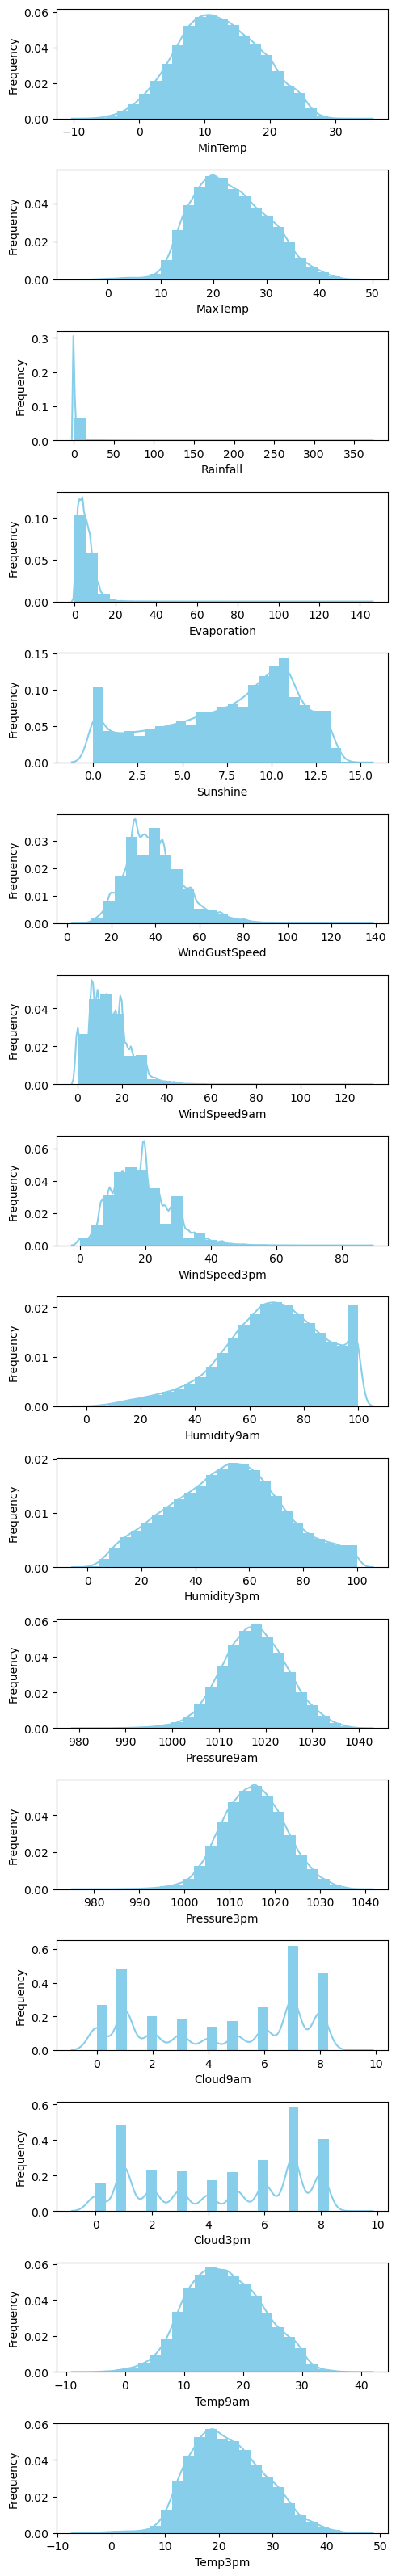

In [12]:
# Look at the data distribution first so that the imputation method is chosen appropriately
# List of columns to create distplots for
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(5,2 * len(columns)))

# Iterate through columns and create distplots
for i, column in enumerate(columns):
    sns.distplot(df_weather[column],
                  bins=25,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1}, ax=axes[i])
    axes[i].set(xlabel=column, ylabel='Frequency')

# Adjust layout
plt.tight_layout()

plt.show()

The distribution plots show that the following features belong to **the normal distribution:**
    - Distribution of MinTemp
    - Distribution of MaxTemp
    - Distribution of Pressure9am
    - Distribution of Pressure3pm
    - Distribution of Temp9am
    - Distribution of Temp3pm

 The distribution plots show that the following features belong to **the right skewed distribution:**
    - Distribution of Rainfall
    - Distribution of Evaporation
    - Distribution of WindGustSpeed
    - Distribution of WindSpeed9am
    - Distribution of WindSpeed3pm
    - Distribution of Humidity3pm

 The distribution plots show that the following features belong to **the left skewed distribution:**
    - Distribution of Sunshine
    - Distribution of Humidity9am

 The distribution plots show that the following features do not belong to a skewed or normal distribution:
    - Distribution of Cloud9am
    - Distribution of Cloud3pm

**Imputing the Missing Values**

In [22]:
# impute the following columns with the mean of each column because the data distribution is normal
columns = ['MinTemp', 'MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
copy_df[columns] =copy_df[columns].apply(lambda x: x.fillna(x.mean()))

# impute the following columns with the median of each column because the data distribution is skewed
columns2 = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
            'Humidity3pm']
copy_df[columns2] = copy_df[columns2].apply(lambda x: x.fillna(x.median()))

# impute the following column with mode (because the distribution does not follow a normal or skewed pattern)
columns3 = ['Cloud9am', 'Cloud3pm']
copy_df[columns3] = copy_df[columns3].apply(lambda x: x.fillna(x.mode()[0]))

# impute all columns of type object with mode
columns4 = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
copy_df[columns4] = copy_df[columns4].apply(lambda x: x.fillna(x.mode()[0]))

In [23]:
# Check if the 'Date' column exists, if it does, extract the new features of year, month, and day then delete the 'Date' column itself.
if 'Date' in copy_df.columns:
    copy_df['Year'] = copy_df['Date'].dt.year
    copy_df['Month'] = copy_df['Date'].dt.month
    copy_df['Day'] = copy_df['Date'].dt.day
    copy_df.drop('Date', axis=1, inplace=True)
else:
    pass

In [15]:
# view information of copy_df
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

**Check and Handling Outliers**
> Why is it important to handle outliers? <br>
Outliers are important because they can have a large influence on statistics derived from the dataset.

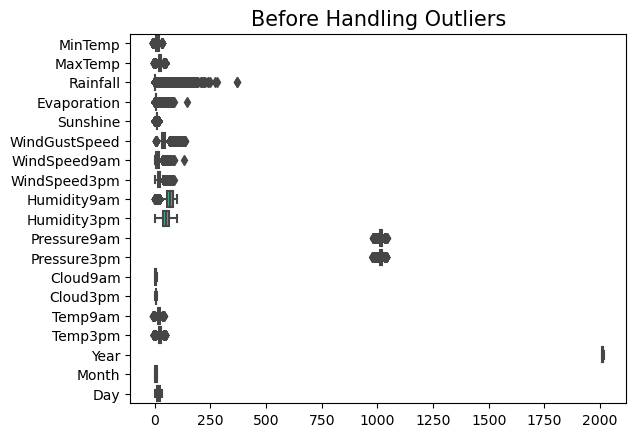

In [16]:
# Box plot to see the distribution of each feature's value
sns.boxplot(data=copy_df, orient="h")
plt.title('Before Handling Outliers', size=15)
plt.show()

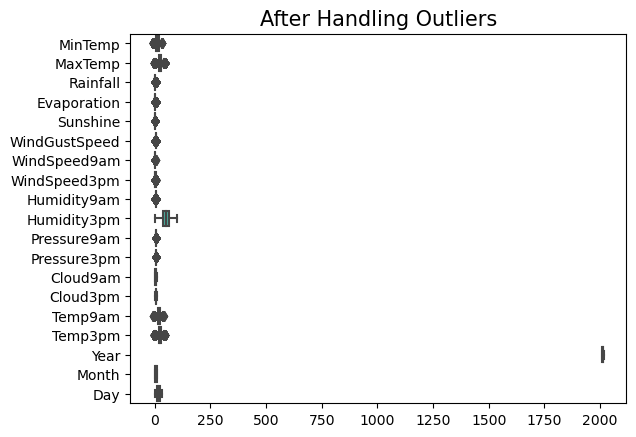

In [24]:
# copy data for anticipation
df_clean = copy_df.copy()

# list the features that will be handled outliers
outlier_features = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm']

# outlier handling here will use the data distribution transformation option
for i in outlier_features:
    df_clean[i] = np.log1p(df_clean[i])
    
# Box plot to see the distribution of each feature's value
sns.boxplot(data=df_clean, orient="h")
plt.title('After Handling Outliers', size=15)
plt.show()

- It can be seen that the comparison on the boxplot that has not been done handling outliers is still a lot of extreme points. However, after doing the distribution transformation the boxplot shows fewer extreme points.<br>
- The reason for performing distribution transformation is to handle quite a lot of outliers in some features so that the quantity of data used when building the model is not reduced.

In [16]:
# view statistic summary of dataset that has been cleaned
df_clean.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,0.476161,1.721749,2.109425,3.662250,2.462061,2.860733,4.199307,51.553396,6.926212,6.923859,5.428186,5.526055,16.990631,21.683390,2012.769751,6.399615,15.712258
std,6.365750,7.088124,0.898829,0.450909,0.503171,0.321464,0.834817,0.539753,0.339821,20.471345,0.006608,0.006559,2.583504,2.424496,6.449221,6.850057,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000,6.889082,6.885612,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,1.609438,2.219203,3.465736,2.079442,2.639057,4.060443,37.000000,6.922151,6.919783,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.100000,22.700000,0.000000,1.757858,2.240710,3.688879,2.639057,2.995732,4.262680,52.000000,6.926233,6.923880,7.000000,7.000000,16.800000,21.400000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.470004,1.824549,2.272126,3.850148,2.995732,3.218876,4.430817,65.000000,6.930299,6.927950,7.000000,7.000000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,5.918894,4.983607,2.740840,4.912655,4.875197,4.477337,4.615121,100.000000,6.948897,6.947553,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


## 5. Data Exploration 
----
EDA here will involve visualizing the raw data that has not been cleaned with the aim of understanding much better the characteristics and patterns of the initial data.

### **Numerical Features**

In [17]:
# List of numerical variables
numeric_features = [feat for feat in copy_df.columns if copy_df[feat].dtypes != 'O']
print('Number of numerical variables : ', len(numeric_features))
copy_df[numeric_features].head()

Number of numerical variables :  19


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


>#### **Discreate Variable**

In [18]:
discreate_features = [feat for feat in numeric_features if len(copy_df[feat].unique())<15]
print('Discreate Variables Count: {}'.format(len(discreate_features)))
print(discreate_features)

Discreate Variables Count: 4
['Cloud9am', 'Cloud3pm', 'Year', 'Month']


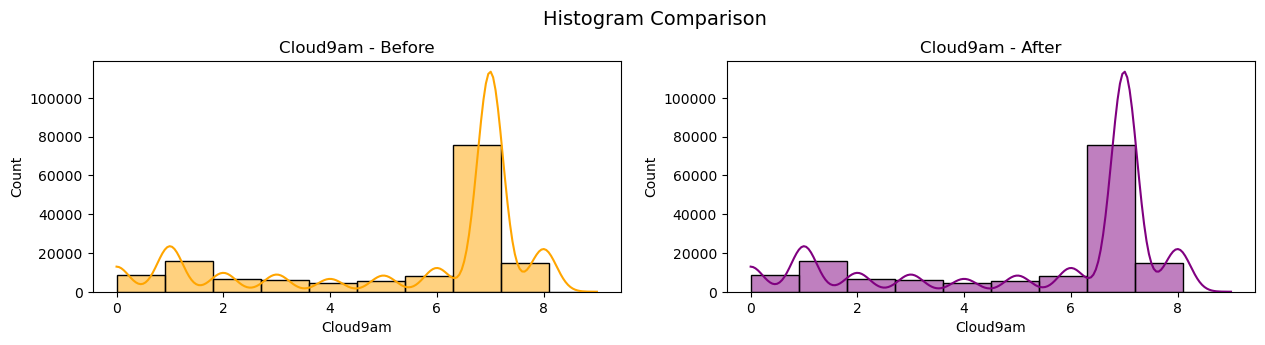

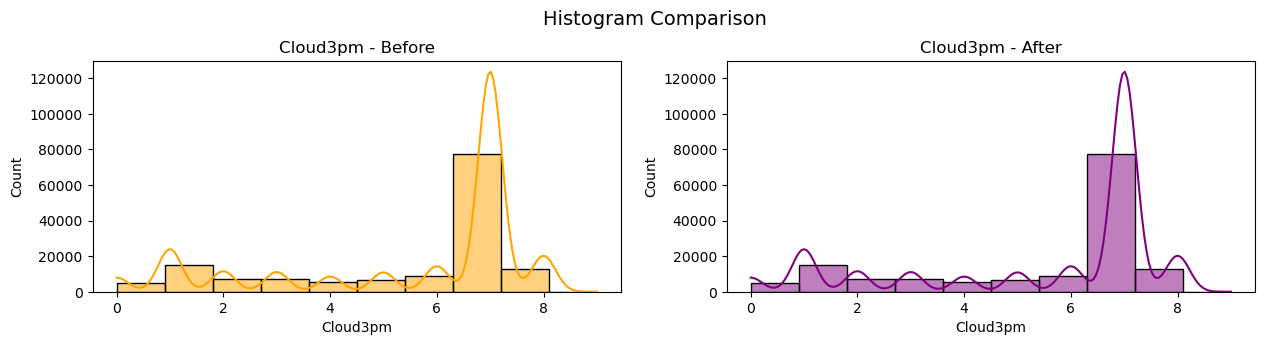

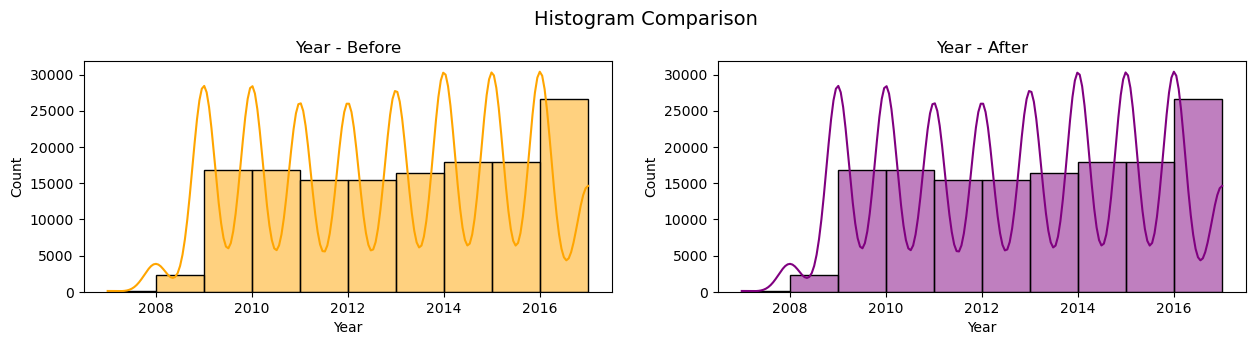

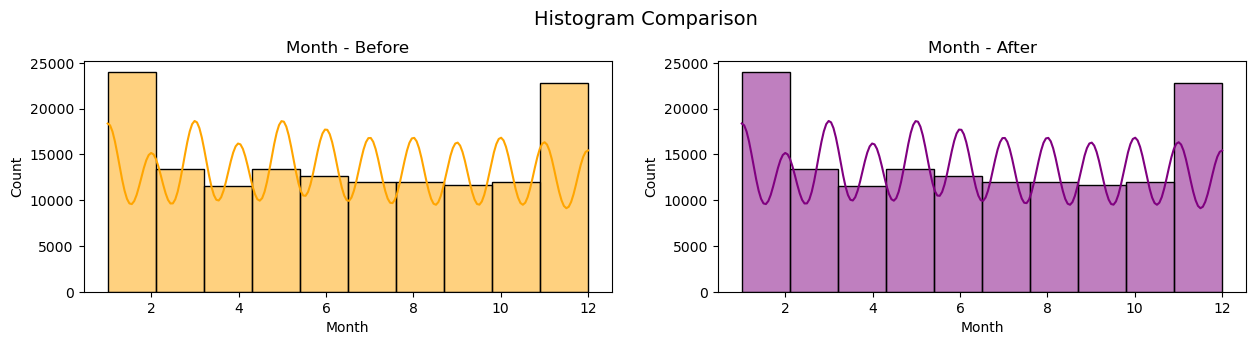

In [19]:
for feature in discreate_features:
    data_before = copy_df
    data_after = df_clean
    fig, axs = plt.subplots(1, 2, figsize=(15, 3))
        
    # Histogram Before Cleaning
    sns.histplot(data_before[feature], bins=10, kde=True, color='Orange', ax=axs[0])
    axs[0].set_title(f'{feature} - Before')
    plt.grid(False)
    
    # Histogram After Cleaning
    sns.histplot(data_after[feature], bins=10, kde=True, color='purple', ax=axs[1])
    axs[1].set_title(f'{feature} - After')
    plt.grid(False)
    
    plt.suptitle('Histogram Comparison', fontsize=14, y=1.05)
    plt.show()

> #### **Continuous Variable**

In [20]:
cont_features = [feat for feat in numeric_features if feat not in discreate_features]
print(cont_features)
print('Continuous feature count : {}'.format(len(cont_features)))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Day']
Continuous feature count : 15


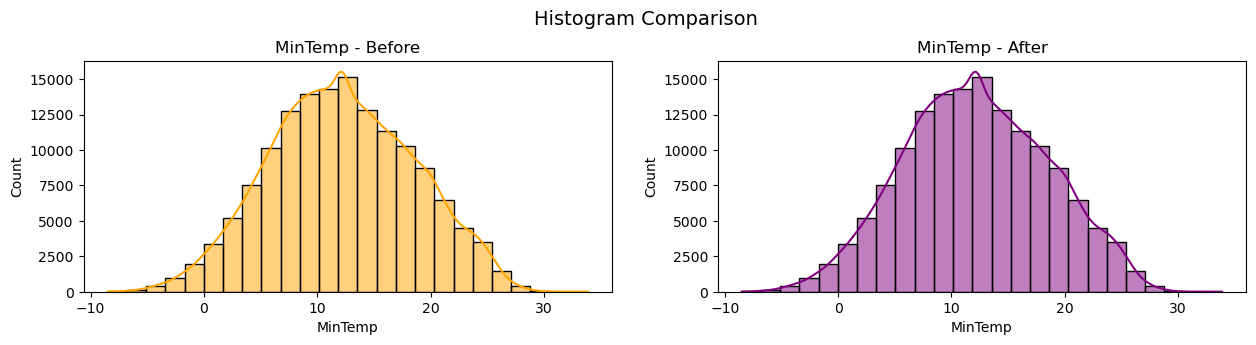

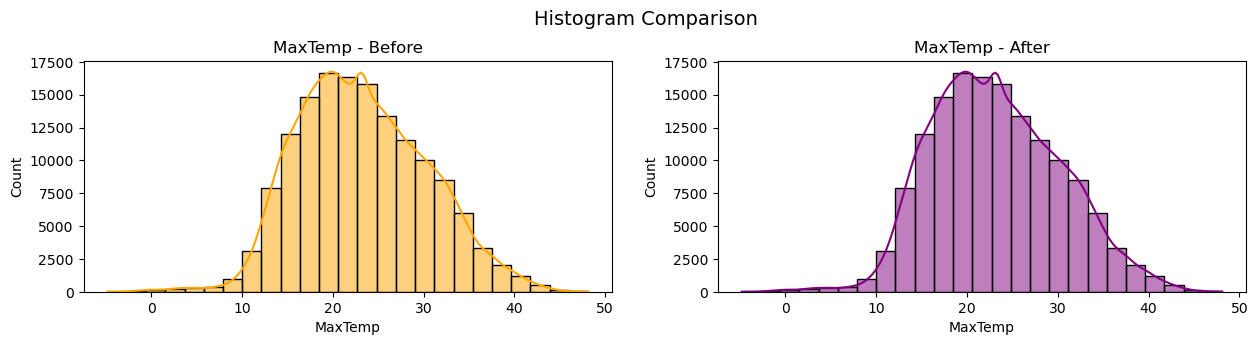

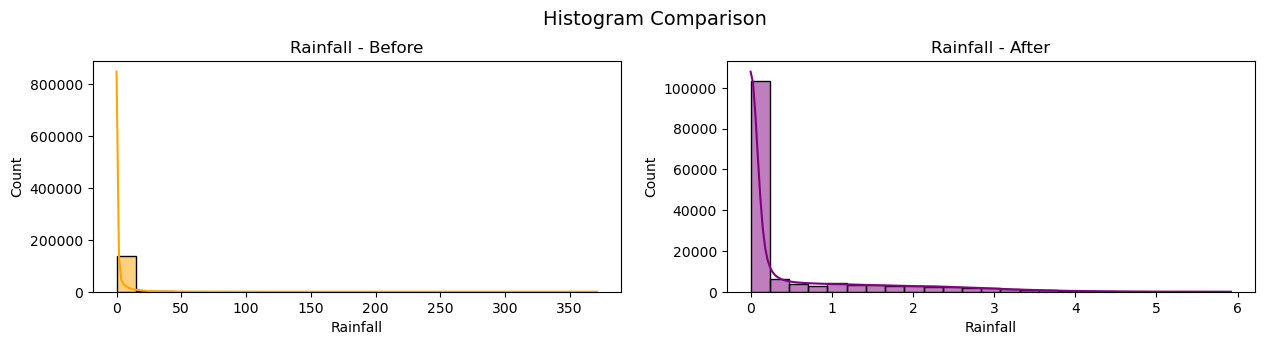

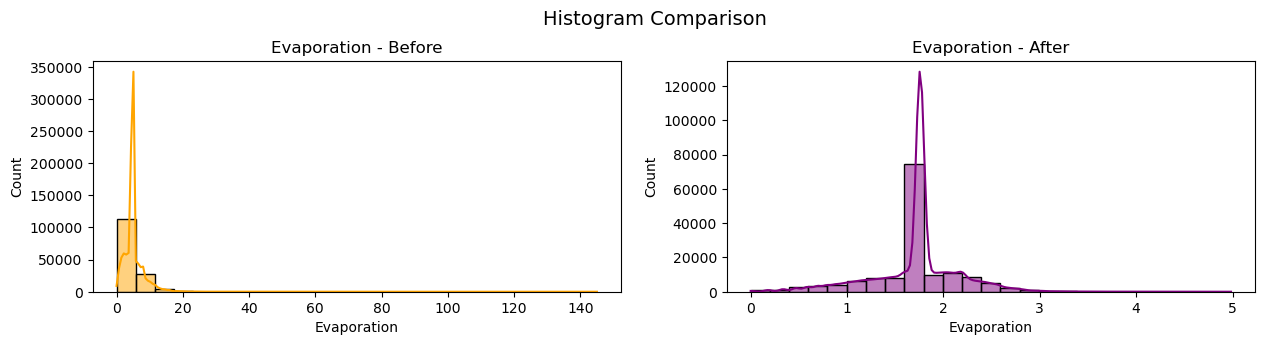

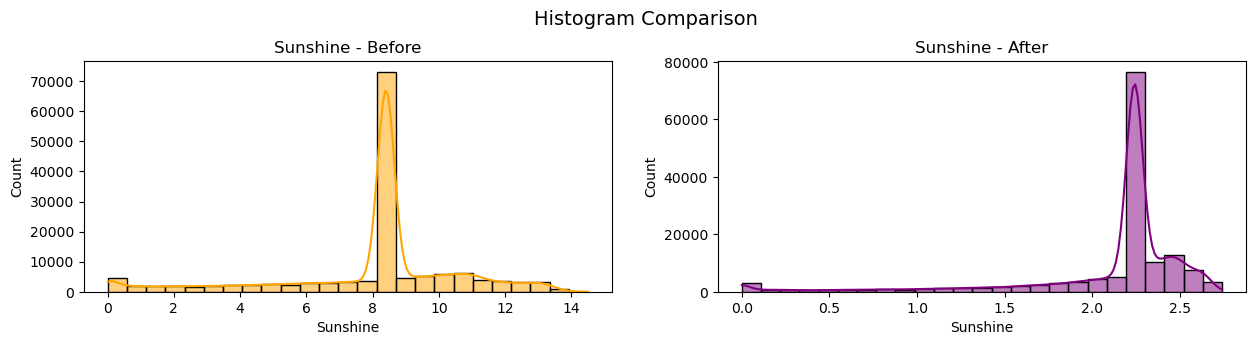

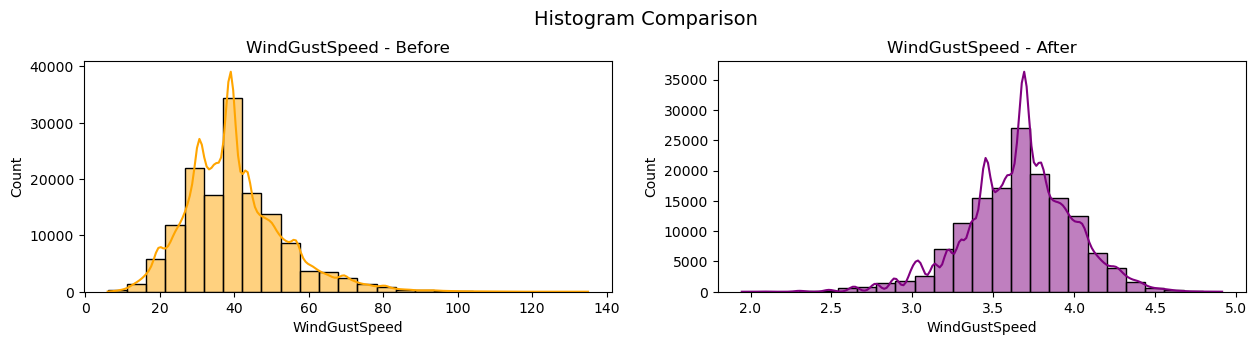

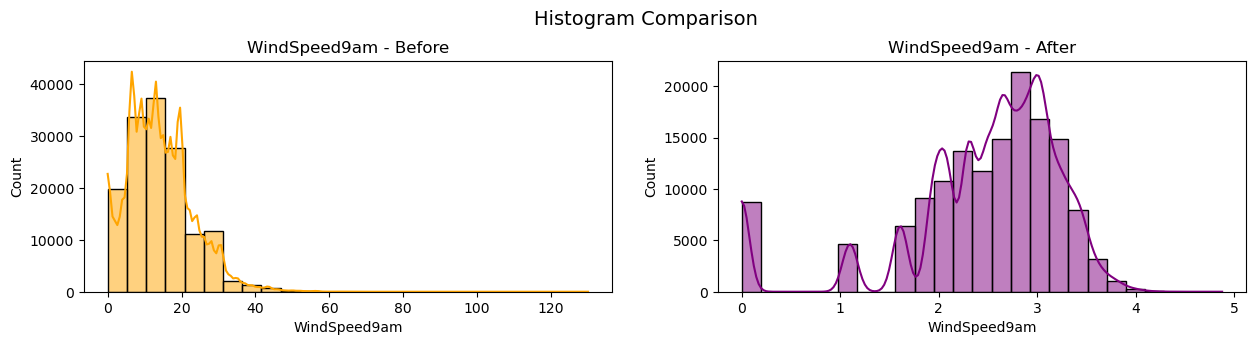

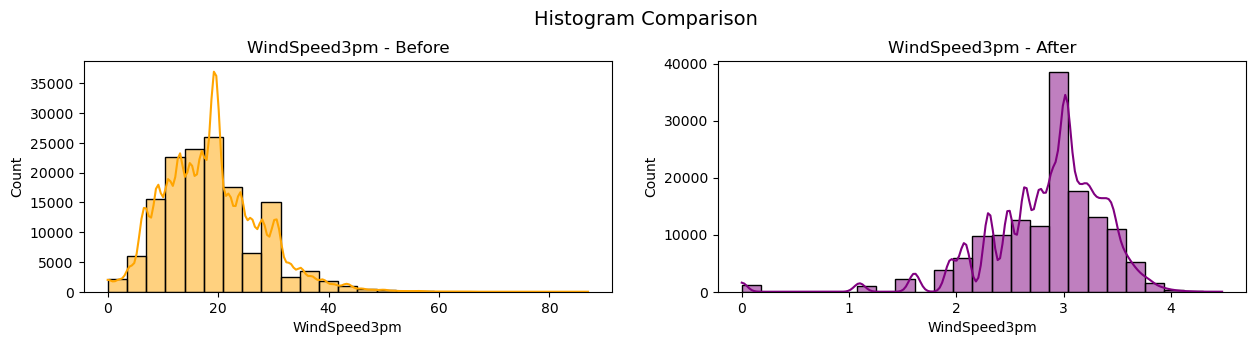

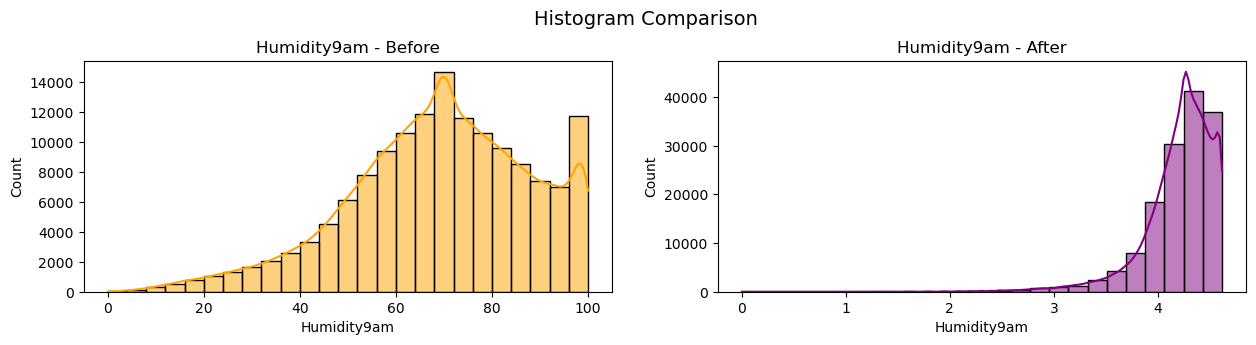

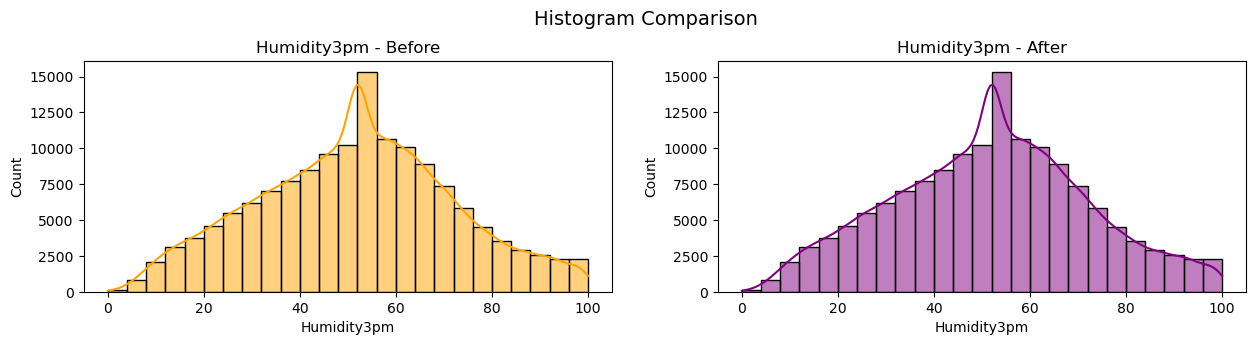

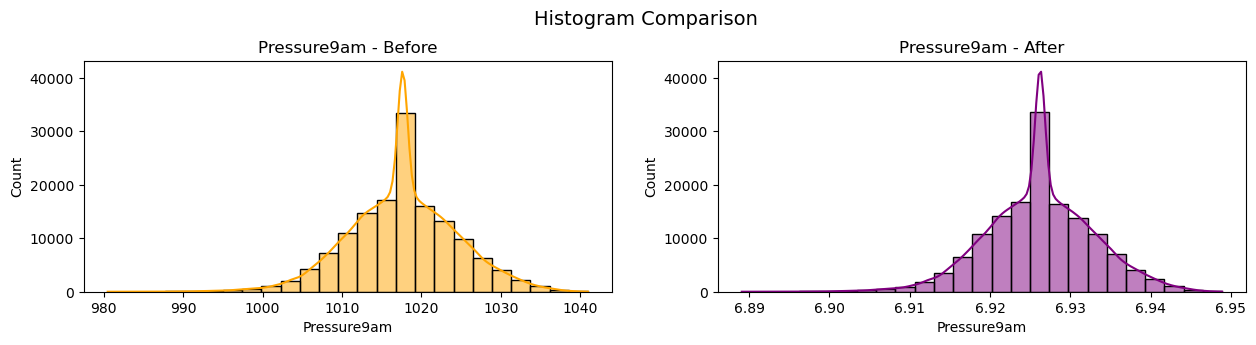

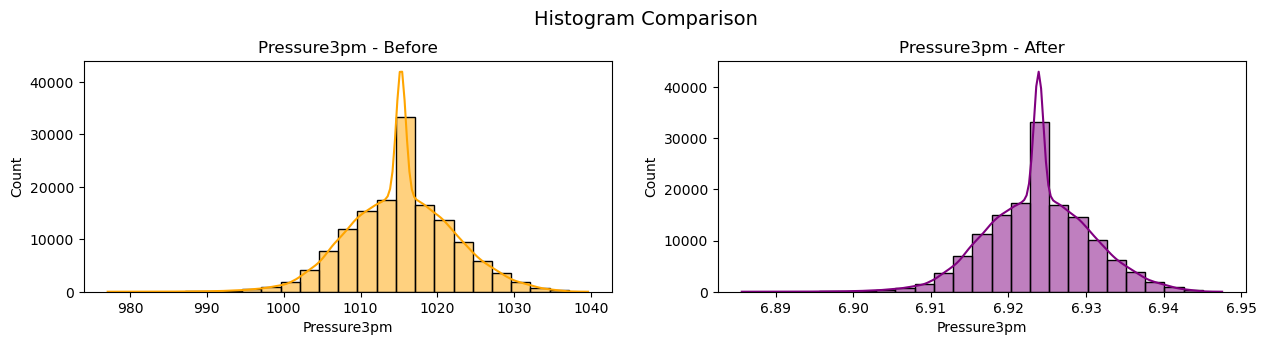

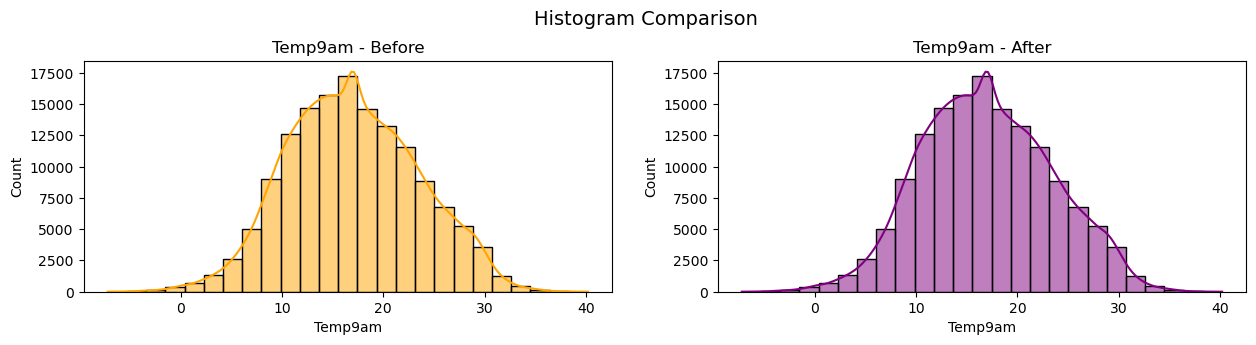

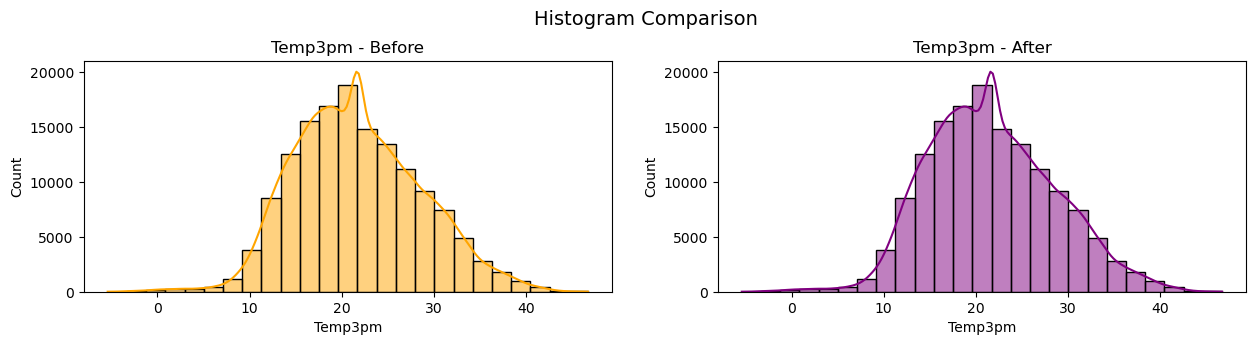

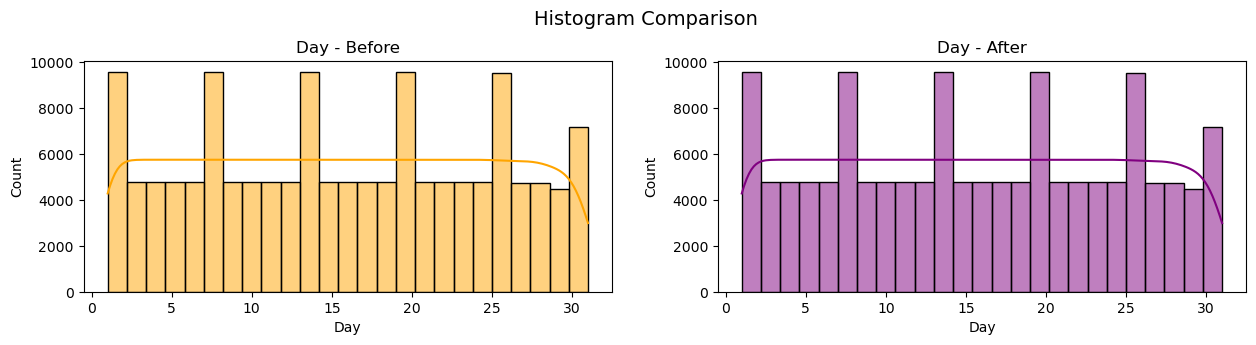

In [21]:
for feature in cont_features:
    data_before = copy_df
    data_after = df_clean
    fig, axs = plt.subplots(1, 2, figsize=(15, 3))
        
    # Histogram Before Cleaning
    sns.histplot(data_before[feature], bins=25, kde=True, color='Orange', ax=axs[0])
    axs[0].set_title(f'{feature} - Before')
    plt.grid(False)
    
    # Histogram After Cleaning
    sns.histplot(data_after[feature], bins=25, kde=True, color='purple', ax=axs[1])
    axs[1].set_title(f'{feature} - After')
    plt.grid(False)
    
    plt.suptitle('Histogram Comparison', fontsize=14, y=1.05)
    plt.show()

Insights:
- **MinTemp**, shows that most of the day's lowest temperatures were in the 12 degree Celsius range. There is no difference between the before and after histograms because outliers were not handled. 
- **MinTemp**, shows that most of the highest temperatures on the day were in the range of 20 degrees Celsius. There is no difference between the before and after histograms because outliers were not handled. 
- **Rainfall**, shows that most of the rainfall values are in the range of 0 point in mm. Outliers still exist but are not very far away after the previous handling.
- **Evaporation**, in (after) indicating that most evaporation values are in the range of 1.2. Also, in (after) the evaporation values range changed to 0 to 5. Outliers still exist but the outlier values are not far away after handling.
- **Sunshine**, in (after) indicating that most of the sunshine values are in the range of 2 to 2.2. Also, in (after) the sunshine values range changed to 0 to 2.7. Outliers still exist but the outlier values are not far away after handling.
- **WindGustSpeed**, shows that most of the highest wind speeds are in the range of 3.5 to 3.6 km/h. Outliers are still present but the outlier values are not very far after the previous handling.
- **WindSpeed9am**, in (before) the wind speed range is recorded from 0 to 130 km/h. However, after handling outliers with log transformation (see after) the wind speed range becomes 0 to 4.8 km/h only. Outliers still exist but the outlier values are not far away after the previous handling, the value of 0 for example is still a lot.
- **WindSpeed3pm**, in (before) the wind speed range is recorded from 0 to 87 km/h. However, after handling outliers with log transformation (see after) the wind speed range becomes 0 to 4.4 km/h only. Outliers also still exist but the outlier values are not very far away.
- **Humidity9am**, in (after) the humidity at 9am is mostly in the 4.2% range every day. The range of humidity in the morning is much smaller, ranging from 0 to 4.6% only. Outliers still exist but the outlier value is not very far after the previous handling. 
- **Humidity3pm**, the humidity at 3pm is mostly in the range of 52% every day. This shows that in the afternoon, the percentage of humidity will usually be higher. Evidenced by the range on the histogram which is from 0 to 100%. There are no outliers in this feature, so there is no difference between the before and after histograms because outliers were not handled.
- **Pressure9am**, in (after) the air pressure at 9am is mostly in the range of 6.9 hpa every day. There are still some outliers seen in this feature even though it has been handled with log transfomartion.
- **Pressure3pm**, in (after) the air pressure at 3pm is mostly the same as that at 9am which is in the range of 6.9 hpa every day. There are still some outliers seen in this feature even though it has been handled with log transfomartion.
- **Temp9am**, the air temperature at 9am is mostly in the range of 16 degrees Celsius. There are outliers but not many also there is no difference between the before and after histograms because outliers were not handled. 
- **Temp3pm**, the air temperature at 3 pm is mostly in the range of 20 degrees Celsius. There are outliers but not many also there is no difference between the before and after histograms because outliers were not handled. 
- **Day**, this histogram shows a constant or equal category of days per frequency of 4786 times. There are no outliers here. There is no difference between the before and after histograms because outliers were not handled. 


### **Categorical Features**

In [22]:
categoric_features = [feat for feat in copy_df.columns if copy_df[feat].dtypes=='O']
print('Categorical Variables Count: {}'.format(len(categoric_features)))
print(categoric_features)

Categorical Variables Count: 6
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [23]:
categoric_features_df = pd.DataFrame(copy_df[categoric_features])
print('Unique Counts of Categorical Features:')
print(categoric_features_df.nunique())

Unique Counts of Categorical Features:
Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64


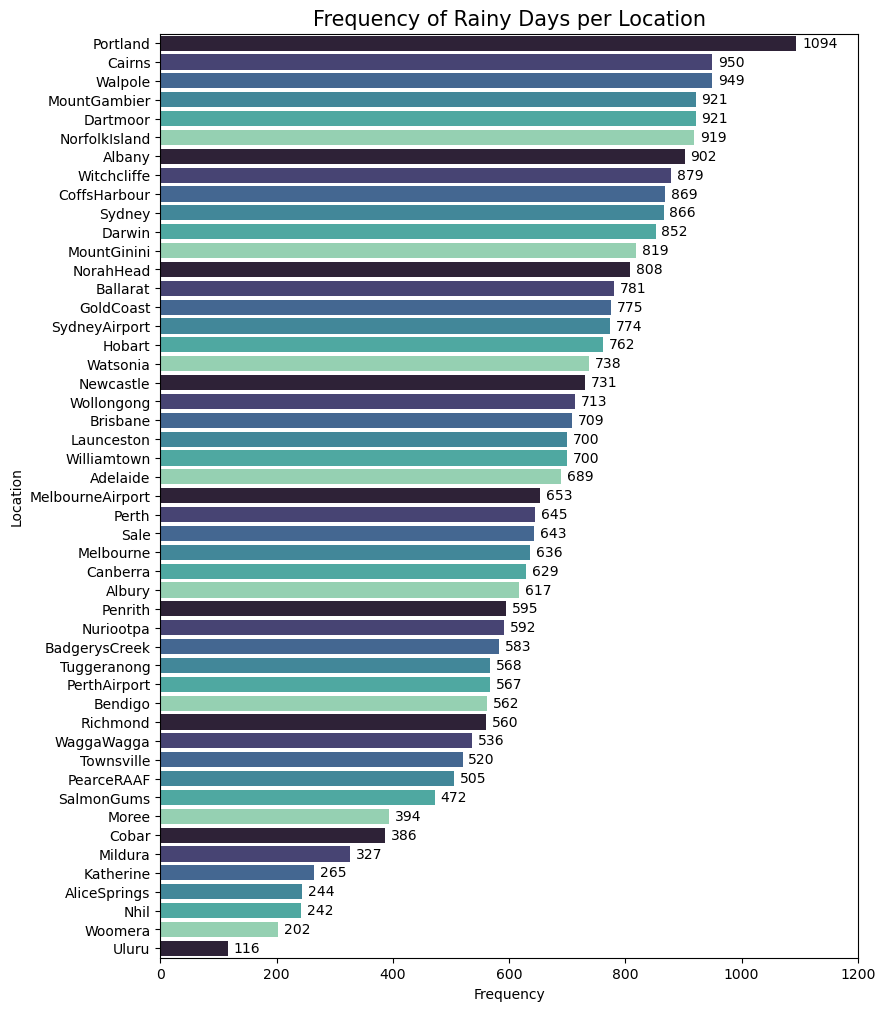

In [24]:
# look for locations where it often rains
rainy_locations = copy_df[copy_df['RainToday'] == 'Yes'].groupby('Location').size().reset_index(name='rainy_days').sort_values(by='rainy_days', ascending=False)

# Visualize
plt.figure(figsize=(9,12))
bar_plot = sns.barplot(x=rainy_locations.rainy_days, y=rainy_locations.Location, palette=sns.color_palette('mako'))
plt.title('Frequency of Rainy Days per Location', fontsize=15)
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.xlim(0, 1200)

# Menambahkan anotasi keterangan pada setiap bar
for i, v in enumerate(rainy_locations.rainy_days):
    bar_plot.text(v + 10, i, str(v), color='black', va='center')
    
plt.show()

Insight:<br>
Portland is recorded as a location that rains frequently. <br>
Meanwhile, Uluru was the location that recorded the least amount of rain.

Text(0.5, 1.0, 'Rain Today in Percent')

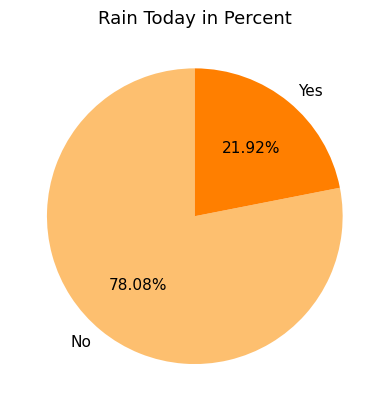

In [417]:
# Plotting the percentage of rain
RainToday_group = copy_df['RainToday'].value_counts()

paired = sns.color_palette("Paired")
# choose the colors
color1 = paired[6]
color2 = paired[7]

# Pie Chart 
plt.pie(x=RainToday_group.values, 
        labels=RainToday_group.index, 
        autopct='%.2f%%', 
        startangle=90, 
        textprops={'fontsize':11},
        colors=(color1, color2))
plt.title('Rain Today in Percent', fontsize=13)

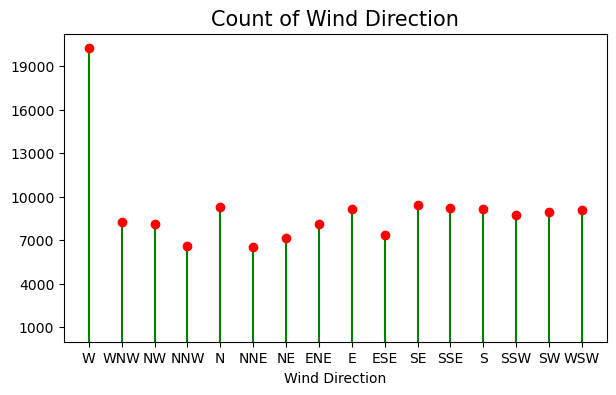

In [25]:
count_windDir = pd.DataFrame(copy_df['WindGustDir'].value_counts().reset_index())

# Sort the DataFrame based on the original order of directions
direction_order = ['W', 'WNW', 'NW', 'NNW', 'N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW'] 
count_windDir = count_windDir.sort_values(by='WindGustDir', key=lambda x: x.map(direction_order.index))

# Visualize as Lollipo Chart
plt.figure(figsize=(7,4))
plt.stem(count_windDir['WindGustDir'], count_windDir['count'], linefmt='g-', markerfmt='ro', basefmt=' ')    
plt.title('Count of Wind Direction', fontsize=15)
plt.xlabel('Wind Direction')
plt.yticks(np.arange(1000, 20000, step=3000))
plt.ylim(bottom=0)

plt.show()

Insight: <br>
based on the 'WindGustDir' feature seen in the lollipop chart above shows that:
- West (W) is the cardinal direction that often appears in the record data.
- North-Northwest (NNW) is the cardinal direction that appears the least in the recorded data.

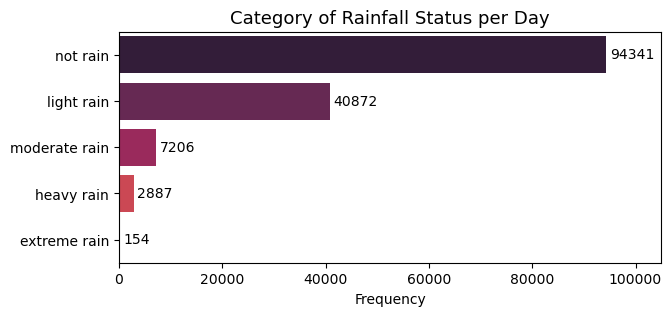

In [26]:
not_rain = copy_df[copy_df['Rainfall'] == 0]
light_rain = copy_df[(copy_df['Rainfall'] > 0) & (copy_df['Rainfall'] <= 9)]
moderate_rain = copy_df[(copy_df['Rainfall'] > 9) & (copy_df['Rainfall'] <= 24)]
heavy_rain = copy_df[(copy_df['Rainfall'] > 24) & (copy_df['Rainfall'] <= 99)]
extreme_rain = copy_df[copy_df['Rainfall'] > 99]

rainfall_rate = [len(not_rain), len(light_rain), len(moderate_rain), len(heavy_rain), len(extreme_rain)]
rainfall_label = ['not rain', 'light rain', 'moderate rain', 'heavy rain', 'extreme rain']

# Visualize
plt.figure(figsize=(7,3))
bar_plot = sns.barplot(x=rainfall_rate, y=rainfall_label, palette=sns.color_palette('rocket'))
plt.title('Category of Rainfall Status per Day', fontsize=13)
plt.xlabel('Frequency')
plt.xlim(0, 105000)

# Added caption annotations to each bar
for i, v in enumerate(rainfall_rate):
    bar_plot.text(v + 700, i, str(v), color='black', va='center')
    
plt.show()

Insight: <br>
Based on the raw data, there are several categories that are considered extreme with rainfall values of more than 99mm, seeing that there are 154 rainfall data recorded as extreme rain. This creates very high outliers so that outliers handling must be done. Meanwhile, the no rain category ranks the highest with 94341 (more than 50%) no rain counts in the rainfall status per day.

In [400]:
# make a new data structure
rain = df_clean.pivot_table(index='Year', columns='Month', values='RainToday', aggfunc='sum')
rain.columns.name = None
rain = rain.reset_index(None)
rain['Total'] = rain.loc[:, 1:12].sum(axis=1)

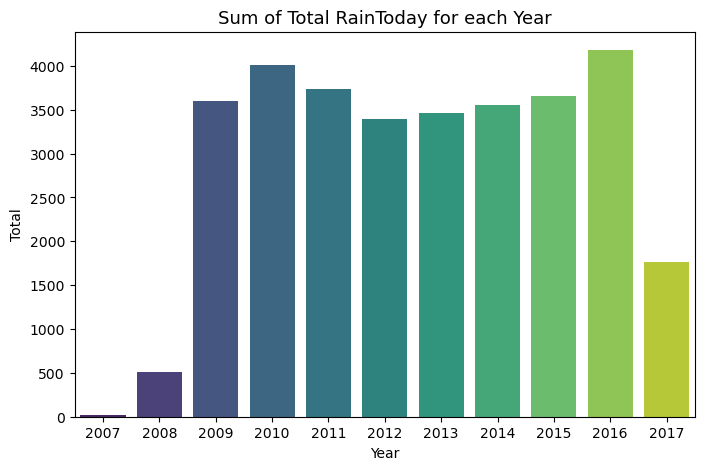

In [399]:
# Plotting the chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=rain, x='Year', y='Total', palette='viridis')
plt.title('Sum of Total RainToday for each Year', fontsize=13)
plt.show()

Insight: <br>
It can be seen on the graph that the year with the most rain is 2016.

## 6. Data Preprocessing
----

### 6.1. Encoding

In [25]:
# Encode the features of the object data type using LabelEncoder

# Define the model encoder
le = LabelEncoder()
l = [] 

# Perform encoding using LabelEncoder
for i in df_clean.columns:
    if df_clean.dtypes[i] == 'O':
        l.append(i)        
for i in l:
    df_clean[i] = le.fit_transform(df_clean[i])

# Check result
df_clean.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
Year               int32
Month              int32
Day                int32
dtype: object

### 6.2. Correlation and Important Features

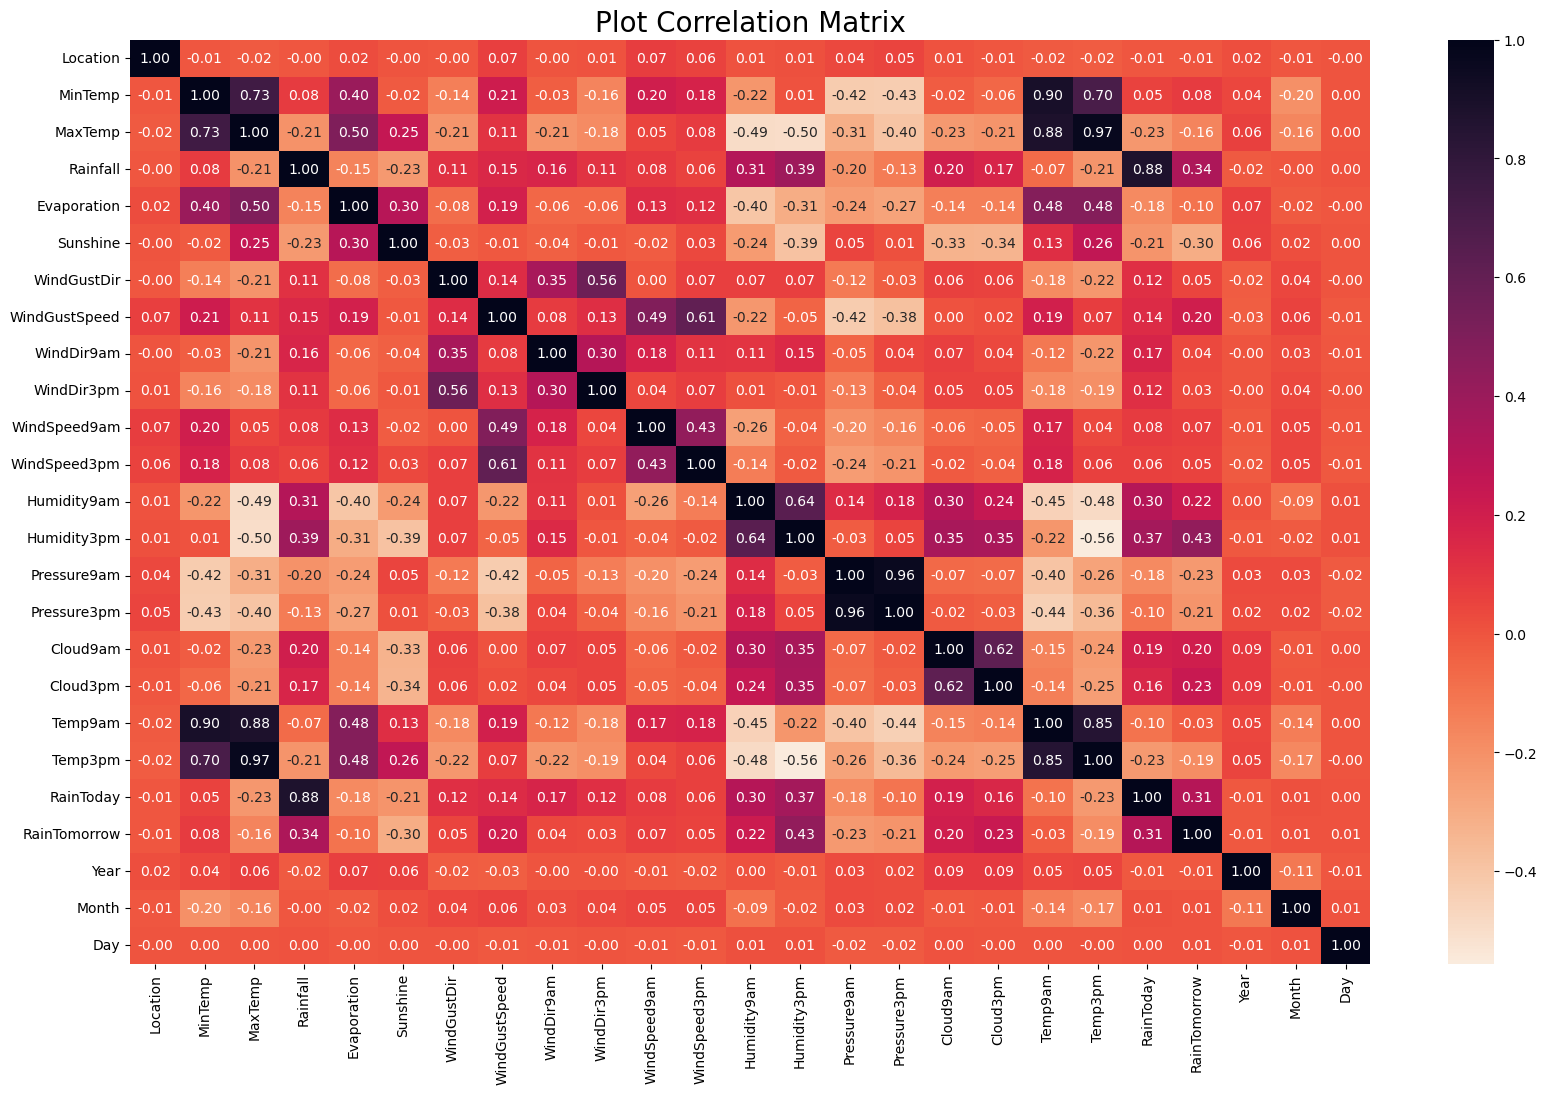

In [28]:
# View the correlation all of features
corr = df_clean.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='rocket_r')
plt.title('Plot Correlation Matrix', size=20)
plt.show()

Insight: <br>
If two variables have a high correlation and both measure or represent similar concepts, one of them can be selected for inclusion in the model. Variable selection can be based on domain knowledge or the results of exploratory data analysis. In the Correlation Matrix Plot, it can be seen that some features have high correlation values between the two independent variables (look beyond the diagonal) indicating multicollinearity.
<br><br>
The following variables were observed to have a high correlation:
- Temp3pm - MaxTemp     : 0.97
- Temp9am - MinTemp     : 0.90

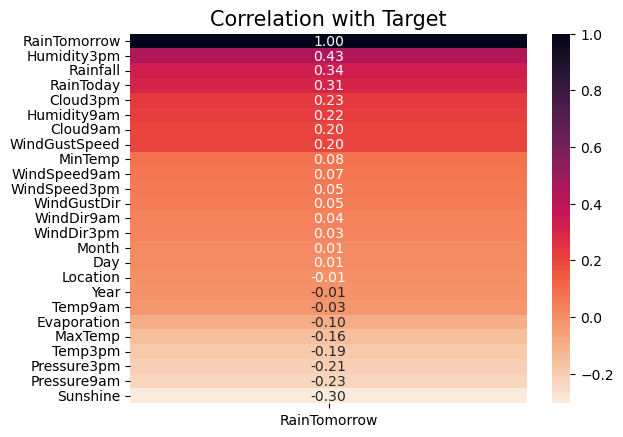

In [401]:
# View the correlation to target
corr_target = df_clean.corr()[['RainTomorrow']].sort_values(by='RainTomorrow', ascending=False)
sns.heatmap(corr_target, annot=True, fmt=".2f", cmap='rocket_r')
plt.title('Correlation with Target', size=15)
plt.show()

Insight: <br>
Correlation with Target, namely the 'RainTomorrow' feature displayed with a heatmap, shows that the highest correlated feature is the 'Humidity3pm' feature with a value of 0.43. While the feature that has the lowest correlation with the target is the 'Sunshine' feature with a value of -0.30.

### 6.3. Splitting Data

In [26]:
# Divide the data into predictor and target variables
df_clean_predictor = df_clean.drop(['RainTomorrow'], axis=1)
df_clean_target = df_clean.RainTomorrow

print('Dataset Features :\n', df_clean.columns)
print('Predictor : ', df_clean_predictor.shape)
print('Target    : ', df_clean_target.shape)

Dataset Features :
 Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')
Predictor :  (145460, 24)
Target    :  (145460,)


In [27]:
# Separate into training and testing set in order to build machine learning models
X_train, X_test, y_train, y_test = train_test_split(df_clean_predictor, df_clean_target, test_size=0.3, random_state=42)

print_ = [X_train, X_test, y_train, y_test]
for i in print_:
    print(i.shape)

(101822, 24)
(43638, 24)
(101822,)
(43638,)


### 6.4. Feature Scaling

In [406]:
# Define the StandardScaler model 
scaler = StandardScaler()

# Fit and transform scaler on train data
X_train_scaled = scaler.fit_transform(X_train)
# Transform scaler on test data
X_test_scaled = scaler.transform(X_test)

## 7. Modelling
----

### 7.1. Logistic Regression
- Logistic Regression is a commonly used model for binary classification problems.
- It works by modeling the probability of the target class
- Suitable for datasets with a linear relationship between features and targets
- Uses the parameter 'max_iter=1000' which is the maximum number of iterations performed by the solver for convergence.
- Also uses the parameter 'random_state=63' which sets the seed to generate random numbers.

In [38]:
# Defining the model
model_log = LogisticRegression(max_iter=1000, random_state=42)

### 7.2. Support Vector Machine (SVM)
- Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
- The advantages of SVM are effective in high dimensional spaces, still efective in cases where number of dimensions is greater than the number of samples, use a subset of training points in the decision function so it also memory efficient.

In [80]:
# Defining the model
model_svm = SVC()

### 7.3. Naive Bayes
- Naive Bayes is a classification method based on simple probabilities and is designed to be used under the assumption that the explanatory variables are independent of each other.
- The advantages of the naive bayes algorithm is that the error rate is lower when the dataset is large, in addition to the accuracy of naive bayes and its speed is higher when applied to larger datasets.

In [62]:
# Defining the model
model_nb = GaussianNB()

### 7.4. Decision Trees
- Decision Trees are a  non-parametric supervised learning method used for classification and regression.
- The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
- A tree can be seen as a piecewise constant approximation

In [46]:
# Defining the model
model_dt = DecisionTreeClassifier(random_state=72)

## 8. Model Training
----

In [39]:
# Logistic Regression
# Train the model using the training sets
model_log.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [81]:
# SVM
# Train the model using the training sets
model_svm.fit(X_train_scaled, y_train)

SVC()

In [63]:
# Naive Bayes
# Train the model using the training sets
model_nb.fit(X_train_scaled, y_train)

GaussianNB()

In [47]:
# Decision Trees
# Train the model using the training sets
model_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=72)

## 9. Model Evaluation
----

#### 9.1. Logistic Regression

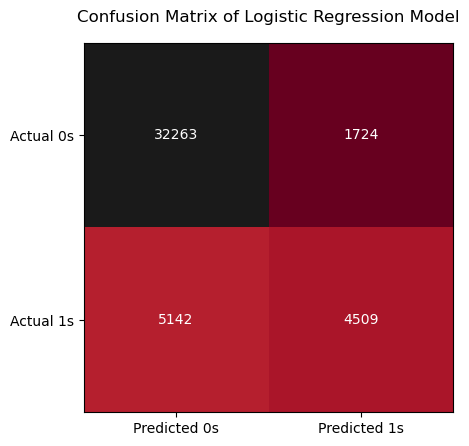

In [354]:
# Predict the response for test set
pred_log        = model_log.predict(X_test_scaled)
acc_log         = accuracy_score(y_test, pred_log) * 100
conf_log        = confusion_matrix(y_test, pred_log)
recall_log      = recall_score(y_test, pred_log) * 100
precision_log   = precision_score(y_test, pred_log) * 100
f1_log          = f1_score(y_test, pred_log) * 100

# Visualize the confusion matrix
fig, ax = plt.subplots()
ax.imshow(conf_log, cmap='RdGy')
ax.grid(False)
ax.set_title('Confusion Matrix of Logistic Regression Model', pad=15)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

# Add annotate
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_log[i, j], ha='center', va='center', color='white')
plt.show()

In [96]:
# Model Improvement for Logistic Regression

# defining parameter range 
log_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                       'penalty': ['l1', 'l2'],
                       'solver': ['liblinear', 'saga']}

# Initialize GridSearchCV
grid_log = GridSearchCV(LogisticRegression(), log_param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_log.fit(X_train_scaled, y_train) 
 
# Print best parameter after tuning 
print(grid_log.best_params_) 

# Perform prediction and display classification report
grid_pred_log = grid_log.predict(X_test_scaled) 
print(classification_report(y_test, grid_pred_log)) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33987
           1       0.72      0.47      0.57      9651

    accuracy                           0.84     43638
   macro avg       0.79      0.71      0.74     43638
weighted avg       0.83      0.84      0.83     43638



In [41]:
# display classification report of starting model before improve
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33987
           1       0.72      0.47      0.57      9651

    accuracy                           0.84     43638
   macro avg       0.79      0.71      0.74     43638
weighted avg       0.83      0.84      0.83     43638



> Looking at the comparison of the classification report of the improved model and the initial model of the Logistic Regression algorithm, it is concluded that there is no change. This means that the initial model has reached the optimal parameters.

#### 9.2. Support Vector Machine (SVM)

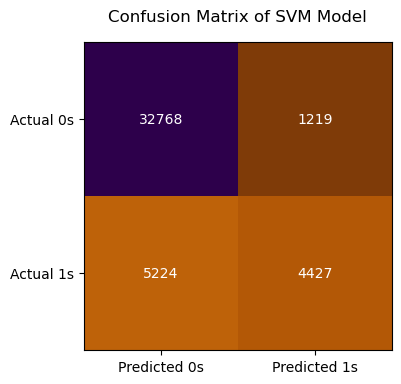

In [355]:
# Predict the response for test set
pred_svm        = model_svm.predict(X_test_scaled)
acc_svm         = accuracy_score(y_test, pred_svm) * 100
conf_svm        = confusion_matrix(y_test, pred_svm)
recall_svm      = recall_score(y_test, pred_svm) * 100
precision_svm   = precision_score(y_test, pred_svm) * 100
f1_svm          = f1_score(y_test, pred_svm) * 100

# Visualize the confusion matrix
fig, ay = plt.subplots(figsize=(4,4))
ay.imshow(conf_svm, cmap='PuOr')
ay.grid(False)
ay.set_title('Confusion Matrix of SVM Model', pad=15)
ay.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ay.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ay.set_ylim(1.5, -0.5)

# Add annotate
for i in range(2):
    for j in range(2):
        ay.text(j, i, conf_svm[i, j], ha='center', va='center', color='white')
plt.show()

In [71]:
# Model Improvement for SVM

# Defining parameter range 
svm_param_dist = {'C': uniform(loc=0, scale=1),
                  'gamma': ['scale', 'auto'],
                  'kernel': ['linear', 'rbf']}

# Initialize RandomizedSearchCV
randomized_svm = RandomizedSearchCV(SVC(), param_distributions=svm_param_dist, n_iter=5, refit=True, verbose=1, n_jobs=-1)

# Fitting the model for grid search
randomized_svm.fit(X_train_scaled, y_train)

# Print best parameter after tuning 
print(randomized_svm.best_params_)

# Perform prediction and display classification report
randomized_pred_svm = randomized_svm.predict(X_test_scaled)
print(classification_report(y_test, randomized_pred_svm))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'C': 0.2370924750110528, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     33987
           1       0.78      0.43      0.56      9651

    accuracy                           0.85     43638
   macro avg       0.82      0.70      0.73     43638
weighted avg       0.84      0.85      0.83     43638



In [83]:
# display classification report of starting model before improve
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     33987
           1       0.78      0.46      0.58      9651

    accuracy                           0.85     43638
   macro avg       0.82      0.71      0.74     43638
weighted avg       0.85      0.85      0.84     43638



> Looking at the comparison of the classification report of the improvement model and the initial model of the Decision Tree algorithm, it is concluded that there is a change. The recall and f1-score values have decreased when the improvement model is carried out, it means that the first model is the most optimal.

#### 9.3. Naive Bayes

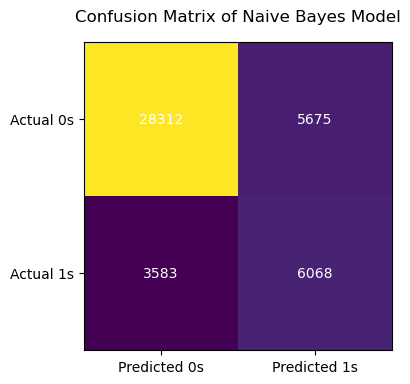

In [356]:
# Predict the response for test set
pred_nb         = model_nb.predict(X_test_scaled)
acc_nb          = accuracy_score(y_test, pred_nb) * 100
conf_nb         = confusion_matrix(y_test, pred_nb)
recall_nb       = recall_score(y_test, pred_nb) * 100
precision_nb    = precision_score(y_test, pred_nb) * 100
f1_nb           = f1_score(y_test, pred_nb) * 100

# Visualize the confusion matrix
fig, ay = plt.subplots(figsize=(4,4))
ay.imshow(conf_nb, cmap='viridis')
ay.grid(False)
ay.set_title('Confusion Matrix of Naive Bayes Model', pad=15)
ay.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ay.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ay.set_ylim(1.5, -0.5)

# Add annotate
for i in range(2):
    for j in range(2):
        ay.text(j, i, conf_nb[i, j], ha='center', va='center', color='white')
plt.show()

In [57]:
# Model Improvement for Naive Bayes

# Defining parameter range 
nb_param_grid = {'priors': [None, [0.3, 0.7], [0.4, 0.6]],
                'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Initialize GridSearchCV
grid_nb = GridSearchCV(GaussianNB(), nb_param_grid, refit = True, verbose = 3 ,n_jobs=-1) 
   
# Fitting the model for grid search 
grid_nb.fit(X_train_scaled, y_train) 
 
# print best parameter after tuning 
print(grid_nb.best_params_) 

# Perform prediction and display classification report
grid_pred_nb = grid_nb.predict(X_test_scaled)  
print(classification_report(y_test, grid_pred_nb)) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'priors': None, 'var_smoothing': 1e-09}
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     33987
           1       0.52      0.63      0.57      9651

    accuracy                           0.79     43638
   macro avg       0.70      0.73      0.71     43638
weighted avg       0.81      0.79      0.79     43638



In [77]:
# display classification report of starting model before improve
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     33987
           1       0.52      0.63      0.57      9651

    accuracy                           0.79     43638
   macro avg       0.70      0.73      0.71     43638
weighted avg       0.81      0.79      0.79     43638



> Looking at the comparison of the classification report of the improved model and the initial model of the Naive Bayes algorithm, it is concluded that there is no change. This means that the initial model has reached the optimal parameters.

#### 9.4. Decision Trees

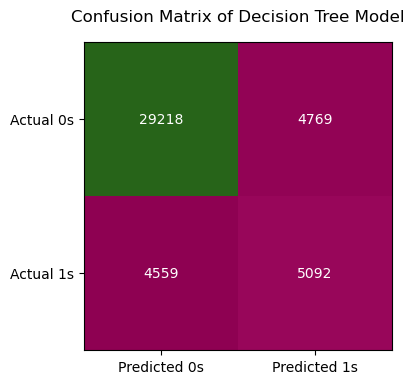

In [357]:
# Predict the response for test set
pred_dt         = model_dt.predict(X_test_scaled)
acc_dt          = accuracy_score(y_test, pred_dt) * 100
conf_dt         = confusion_matrix(y_test, pred_dt)
recall_dt       = recall_score(y_test, pred_dt) * 100
precision_dt    = precision_score(y_test, pred_dt) * 100
f1_dt           = f1_score(y_test, pred_dt) * 100

# Visualize the confusion matrix
fig, ay = plt.subplots(figsize=(4,4))
ay.imshow(conf_dt, cmap='PiYG')
ay.grid(False)
ay.set_title('Confusion Matrix of Decision Tree Model', pad=15)
ay.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ay.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ay.set_ylim(1.5, -0.5)

# Add annotate
for i in range(2):
    for j in range(2):
        ay.text(j, i, conf_dt[i, j], ha='center', va='center', color='white')
plt.show()

In [33]:
# Model Improvement for Decision Tree
# defining parameter range 
dt_param_grid = {'criterion': ['gini', 'entropy'],
                 'splitter': ['best', 'random'],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Initialize GridSearchCV
grid_dt = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_dt.fit(X_train_scaled, y_train) 
 
# print best parameter after tuning 
print(grid_dt.best_params_) 

# Perform prediction and display classification report
grid_pred_dt = grid_dt.predict(X_test_scaled) 
print(classification_report(y_test, grid_pred_dt)) 

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     33987
           1       0.70      0.48      0.57      9651

    accuracy                           0.84     43638
   macro avg       0.78      0.71      0.74     43638
weighted avg       0.83      0.84      0.83     43638



In [93]:
print(f1_score(y_test, grid_pred_dt))

0.5693412732518877


In [50]:
# display classification report of starting model before improve
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     33987
           1       0.52      0.53      0.52      9651

    accuracy                           0.79     43638
   macro avg       0.69      0.69      0.69     43638
weighted avg       0.79      0.79      0.79     43638



> Looking at the comparison of the classification report of the improved model and the initial model of the Decision Tree algorithm, it is concluded that there is a change. The precision, f1-score, and accuracy values increased. Meanwhile, the recall value decreased.

### 9.5. Choose the Model

The one with the highest f1-score (0.58) and accuracy score (0.85) is from the 'pred_svm' result, which is the predicted result from the initial fitting of the SVM experiment. So the inference model will be tested using the SVM model algorithm before modifying the parameters.

## 10. Model Inference
----

In [349]:
# make a new data test
inference = {'Location':[2,6,7,9,15],
             'MinTemp':[4.5, 15.1,  3.7, 11.2, 13.0],
             'MaxTemp':[27.4, 39.1, 44.7, 46.3, 46.5],
             'Rainfall':[0.724164, 6.880566, 31.793987,  0.000000, 0.955511],
             'Evaporation':[3.91999118, 5.698519, 1.64865863, 1.82454929, 4.374532],
             'Sunshine':[1.829028, 0.256137, 1.213351, 1.425972, 2.883480],
             'WindGustDir':[5, 1, 13, 6, 2],
             'WindGustSpeed':[2.781098, 3.494341, 4.420203, 4.807785, 4.336019],
             'WindDir9am':[3, 9, 8, 8, 11],
             'WindDir3pm':[7, 2, 10, 12, 4],
             'WindSpeed9am':[3.27888176, 1.95398982, 2.90121000, 2.50502998, 3.13265504],
             'WindSpeed3pm':[4.82747016, 4.20924751, 2.79047711, 1.41018533, 3.12065504],
             'Humidity9am':[2.16725906, 1.70264116, 2.88601323, 3.96033472, 3.86966536],
             'Humidity3pm':[54, 20, 86, 32, 93],
             'Pressure9am':[6.62907139, 6.59054065, 6.45929996, 6.80072383, 6.74613518],
             'Pressure3pm':[6.45656735, 6.00203502, 6.74207416, 6.60984338, 6.27528638],
             'Cloud9am':[2, 5, 8, 5, 4],
             'Cloud3pm':[3, 4, 0, 6, 7],
             'Temp9am':[33.7, 39.1, 24.5, 45.2, 27.5],
             'Temp3pm':[20.5, 19.9, 39.3, 42.8, 28.6],
             'RainToday':[0, 1, 1, 0, 1],
             'Year':[2018, 2018, 2018, 2018, 2018],
             'Month':[1, 1, 1, 1, 1],
             'Day':[1, 2, 3, 4, 5]
            }
inference = pd.DataFrame(inference)
inference

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,2,4.5,27.4,0.724164,3.919991,1.829028,5,2.781098,3,7,...,6.629071,6.456567,2,3,33.7,20.5,0,2018,1,1
1,6,15.1,39.1,6.880566,5.698519,0.256137,1,3.494341,9,2,...,6.590541,6.002035,5,4,39.1,19.9,1,2018,1,2
2,7,3.7,44.7,31.793987,1.648659,1.213351,13,4.420203,8,10,...,6.459300,6.742074,8,0,24.5,39.3,1,2018,1,3
3,9,11.2,46.3,0.000000,1.824549,1.425972,6,4.807785,8,12,...,6.800724,6.609843,5,6,45.2,42.8,0,2018,1,4
4,15,13.0,46.5,0.955511,4.374532,2.883480,2,4.336019,11,4,...,6.746135,6.275286,4,7,27.5,28.6,1,2018,1,5


In [411]:
raintomorrow_predict = model_svm.predict(inference)
print("tomorrow's rain prediction result:")
print(raintomorrow_predict)

tomorrow's rain prediction result:
[0 0 0 0 0]


## 11. Conclusion
----

After exploring the data and building the model, the following conclusions can be drawn:
1. Portland is recorded as a location that rains frequently. Meanwhile, Uluru was the location that recorded the least amount of rain.
2. The year with the most rain is 2016.
3. The percentage of rain occurring based on the data is 21.92%. This means that the percentage of non-rain dominates at 78.08%. There is a class imbalance here that somewhat affects the performance of the machine learning model.
4. There is a high correlation value between two independent variables that causes multicollinearity and may also affect the performance of the model built, it was tried to do feature selection by removing some features that were low correlated to the target and selecting one of the two highly correlated features but the results did not show any improvement in the performance of the model in any way but even decreased so this experiment was deleted and only left the model test using the full feature.
5. Improvement model is not much different in performance from the initial model built, there is an increase in the decision tree model but the results are still much better than the SVM model before improvement.
6. It was decided to select the model evaluation with the highest f1-score because the target class values were unbalanced. And the highest f1-score value is in the SVM model of 0.72.